https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor

In [1]:
%reload_kedro

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


2023-10-09 14:00:35,046 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: C:\Users\Dushku\PycharmProjects\monash-datahack-2023
2023-10-09 14:00:35,226 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-10-09 14:00:35,252 - kedro.framework.hooks.manager - INFO - Registered hooks from 1 installed plugin(s): kedro-telemetry-0.2.5
2023-10-09 14:00:35,332 - kedro.extras.extensions.ipython - INFO - ** Kedro project Monash datahack 2023
2023-10-09 14:00:35,333 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\kedro\framework\context\context.py:344: UserWarning: Credentials not found in your Kedro project config.
No files found in ['C:\\Users\\Dushku\\PycharmProjects\\monash-datahack-2023\\conf\\base', 'C:\\Users\\Dushku\\PycharmProjects\\monash-datahack-2023\\conf\\local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  warn(f"Credentials not found in your Kedro project config.\n{str(exc)}")


In [2]:
catalog.list()

['raw_data',
 'preprocessed_data_with_type_classification',
 'preprocessed_data_with_total_classification',
 'preprocessed_data_not_recycled',
 'preprocessed_data_08_12_13',
 'preprocessed_data_not_08_12_13',
 'preprocessed_data_with_mining',
 'preprocessed_data_without_mining',
 'preprocessed_data_19_21',
 'preprocessed_data_not_19_21',
 'preprocessed_data_without_australia',
 'encoded_data_without_australia',
 'preprocessed_data_with_australia',
 'encoded_data_with_australia',
 'encoded_data_19_21',
 'encoded_data_not_19_21',
 'encoded_data_with_type_classification',
 'encoded_data_with_total_classification',
 'encoded_data_without_zero_values',
 'encoded_data_not_recycled',
 'encoded_data_08_12_13',
 'encoded_data_not_08_12_13',
 'encoded_data_with_mining',
 'encoded_data_without_mining',
 'companies',
 'reviews',
 'shuttles',
 'data_processing.preprocessed_companies',
 'data_processing.preprocessed_shuttles',
 'model_input_table',
 'data_science.active_modelling_pipeline.regressor'

In [3]:
df = catalog.load('preprocessed_data_with_type_classification')

2023-10-09 14:00:35,970 - kedro.io.data_catalog - INFO - Loading data from `preprocessed_data_with_type_classification` (CSVDataSet)...


In [4]:
df = df[df['Fate'] == 'Recycling']

In [5]:
df.head()

Jurisdiction                           Category       Type Management  \
1          ACT                          Biosolids  Biosolids  Recycling   
3          ACT                          Biosolids  Biosolids  Recycling   
4          ACT  Building and demolition materials    Asphalt  Recycling   
5          ACT  Building and demolition materials    Asphalt  Recycling   
6          ACT  Building and demolition materials    Asphalt  Recycling   

        Fate  y          ds  Sub-stream  
1  Recycling  0  2021-12-31           3  
3  Recycling  0  2021-12-31           9  
4  Recycling  0  2021-12-31           2  
5  Recycling  0  2021-12-31           3  
6  Recycling  0  2021-12-31           1

In [6]:
df.columns

Index(['Jurisdiction', 'Category', 'Type', 'Management', 'Fate', 'y', 'ds',
       'Sub-stream'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20352 entries, 1 to 54226
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Jurisdiction  20352 non-null  object
 1   Category      20352 non-null  object
 2   Type          20352 non-null  object
 3   Management    20352 non-null  object
 4   Fate          20352 non-null  object
 5   y             20352 non-null  int64 
 6   ds            20352 non-null  object
 7   Sub-stream    20352 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.4+ MB


In [8]:
df.nunique()

Jurisdiction       9
Category          14
Type              72
Management         3
Fate               1
y               4536
ds                15
Sub-stream         8
dtype: int64

In [9]:
import plotly.express as px
fig = px.histogram(df, x="y")
fig.show()

In [17]:
df_not_zero = df[df['y'] != 0]
df_not_zero.head(100)

Jurisdiction                           Category  \
8            ACT  Building and demolition materials   
9            ACT  Building and demolition materials   
11           ACT  Building and demolition materials   
12           ACT  Building and demolition materials   
13           ACT  Building and demolition materials   
..           ...                                ...   
615    Australia                             Mining   
643    Australia                             Mining   
647    Australia                             Mining   
649    Australia         Organic primary production   
652    Australia         Organic primary production   

                                Type Management       Fate        y  \
8        Bricks, concrete and pavers  Recycling  Recycling   141663   
9        Bricks, concrete and pavers  Recycling  Recycling        4   
11       Bricks, concrete and pavers  Recycling  Recycling   141667   
12       Ceramics, tiles and pottery  Recycling  Recycling    36191   
13       Ceramics, tiles and pottery  Recycling  Recycling        1   
..                               ...        ...        ...      ...   
615           Oil and gas extraction  Recycling  Recycling     3246   
643      Silver-lead-zinc ore mining  Recycling  Recycling      640   
647      Silver-lead-zinc ore mining  Recycling  Recycling      640   
649  Primary production animal waste  Recycling  Recycling  1568280   
652  Primary production animal waste  Recycling  Recycling  1568280   

             ds  Sub-stream  
8    2021-12-31           2  
9    2021-12-31           3  
11   2021-12-31           9  
12   2021-12-31           2  
13   2021-12-31           3  
..          ...         ...  
615  2021-12-31           9  
643  2021-12-31           8  
647  2021-12-31           9  
649  2021-12-31           5  
652  2021-12-31           9  

[100 rows x 8 columns]

In [10]:
df_str = catalog.load("preprocessed_data_without_mining")

2023-10-09 14:00:36,624 - kedro.io.data_catalog - INFO - Loading data from `preprocessed_data_without_mining` (CSVDataSet)...


## Categorical attributes

In [11]:
# List of columns to exclude
exclude_columns = ['y']

# Create a dictionary to store unique values for each column
unique_values_dict = {}

# Loop through columns and get unique values
for column in df_str.columns:
    if column not in exclude_columns:
        unique_values_dict[column] = df_str[column].unique()

# Print unique values for each column
for column, unique_values in unique_values_dict.items():
    print(f"Unique values for {column}:")
    print(unique_values)
    print()

Unique values for Jurisdiction:
['ACT' 'Australia' 'NSW' 'NT' 'Qld' 'SA' 'Tas' 'Vic' 'WA']

Unique values for Category:
['Biosolids' 'Building and demolition materials' 'Glass'
 'Hazardous wastes' 'Metals' 'Organics' 'Plastics'
 'Textiles, leather & rubber (excl. tyres)' 'Mineral processing'
 'Organic primary production' 'Organic processing' 'Ash'
 'Paper & cardboard' 'Unclassified materials']

Unique values for Type:
['Biosolids' 'Asphalt' 'Bricks, concrete and pavers'
 'Ceramics, tiles and pottery' 'Plasterboard & cement sheeting' 'Rubble'
 'Soil, sand and rock not contaminated above any threshold requiring classification as contaminated soils (N120)'
 'Glass from food and beverage containers' 'Other glass' 'Acids (B)'
 'Alkalis (C)' 'Asbestos (N220)' 'Clinical and pharmaceutical (R)'
 'Contaminated soils (N120)' 'Food-derived hazardous wastes (K100, K110)'
 'Inorganic chemicals (D)' 'Oils (J)' 'Organic chemicals (M)'
 'Organic solvents (G)' 'Other'
 'Other hazardous organic wastes (

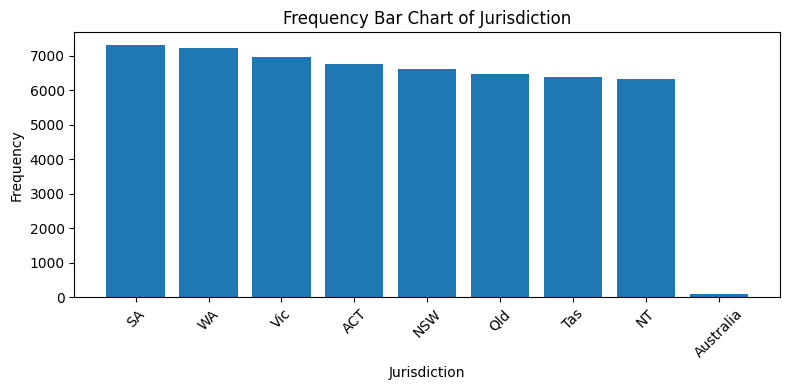

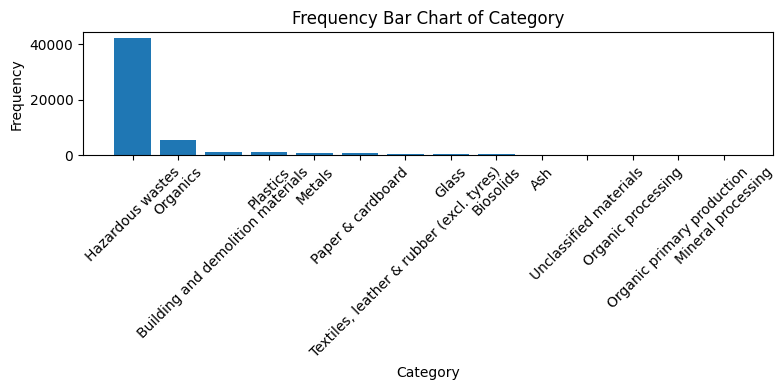

C:\Users\Dushku\AppData\Local\Temp\ipykernel_12064\311918135.py:10: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



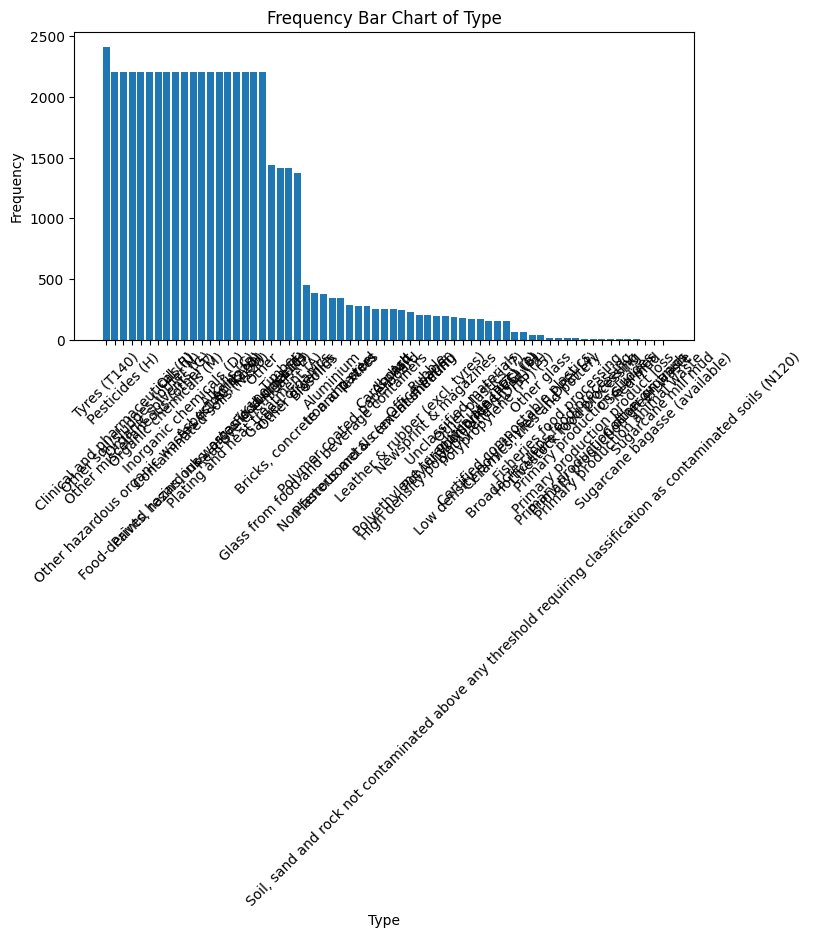

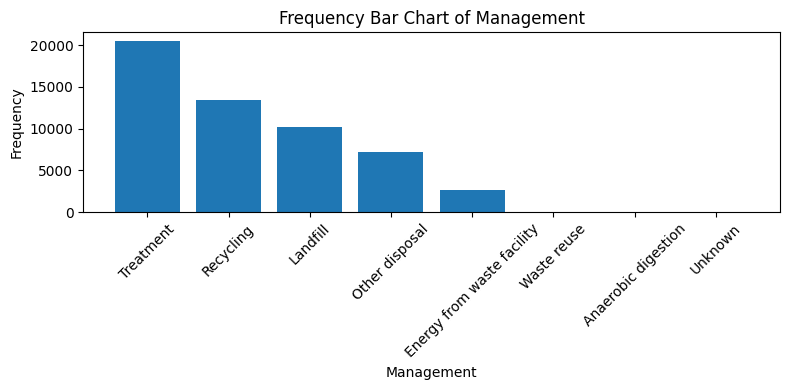

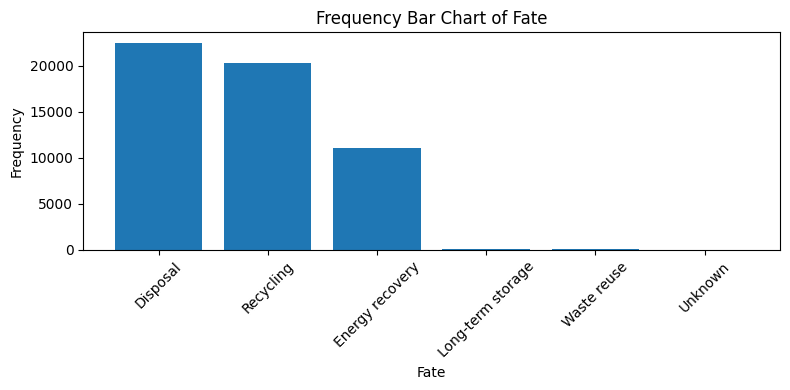

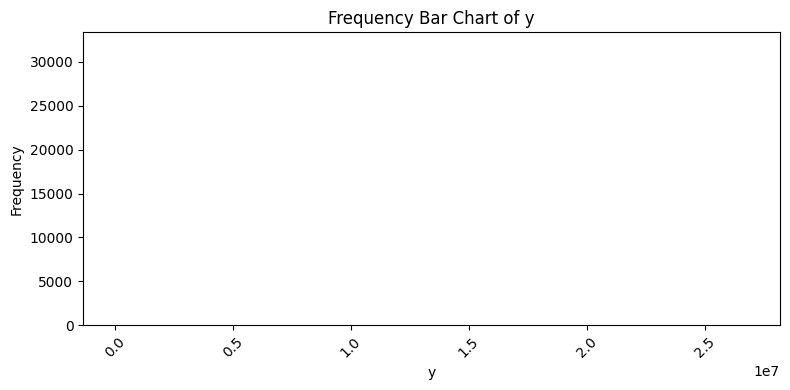

2023-10-09 14:00:43,430 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-10-09 14:00:43,433 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


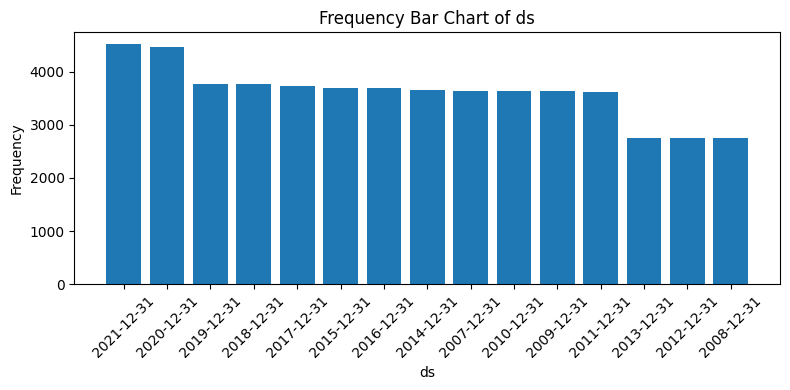

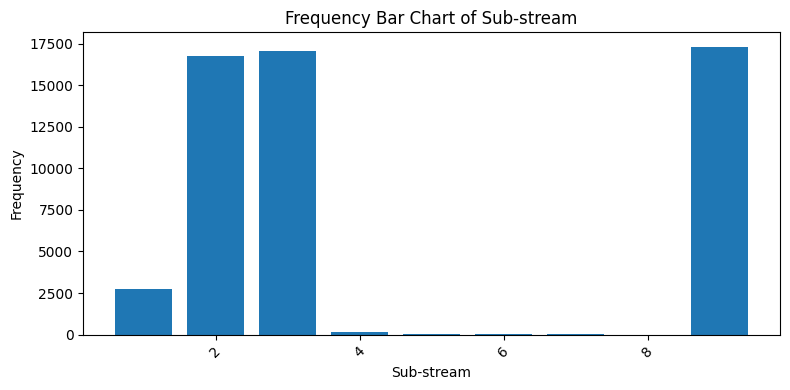

In [12]:
# Iterate through columns and create bar charts for categorical attributes
for column in df_str.columns:
    value_counts = df_str[column].value_counts()
    plt.figure(figsize=(8, 4))
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Bar Chart of {column}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Null values

In [13]:
import seaborn as sns

null_df = df_str.isnull().sum()
print(null_df)

Jurisdiction    0
Category        0
Type            0
Management      0
Fate            0
y               0
ds              0
Sub-stream      0
dtype: int64


## Calculate point-biserial correlation of each feature with 'y'

In [14]:
correlations = {}
for column in df.columns:
    correlation, _ = stats.pointbiserialr(df[column], df['y'])
    correlations[column] = correlation
    
# Print the correlations
print(correlations)

# Convert the correlations dictionary to a DataFrame
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation'])

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(correlation_df['Feature'], correlation_df['Correlation'])
plt.xlabel('Features')
plt.ylabel('Correlation with y')
plt.title('Point-Biserial Correlation with y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

### Test
Drop all values in y with 0

In [ ]:
# Drop rows where 'y' is equal to 0
df_filtered = df[df['y'] != 0]

In [ ]:
# Calculate point-biserial correlation for each feature with 'y'
from scipy import stats

correlations = {}
for column in df_filtered.columns:
    correlation, _ = stats.pointbiserialr(df_filtered[column], df_filtered['y'])
    correlations[column] = correlation
    
# Print the correlations
print(correlations)

In [ ]:
catalog.save("encoded_data_without_zero_values", df_filtered)